# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


### Importing the training set

In [14]:
# Updated file paths
train_data_path = '/Users/ebaniez/Downloads/Google_Stock_Price_Train.csv'
test_data_path = '/Users/ebaniez/Downloads/Google_Stock_Price_Test-1.csv'

# Load the datasets
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)



In [15]:
# Display the first few rows of the training data
print("Training Data Head:")
print(train_df.head())

# Display the first few rows of the test data
print("\nTest Data Head:")
print(test_df.head())


Training Data Head:
       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800

Test Data Head:
       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400


### Feature Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[['Open']])


### Creating a data structure with 60 timesteps and 1 output

In [17]:
X_train = []
y_train = []
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping for LSTM (Adding 3rd dimension)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


### Reshaping

In [18]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense


### Initialising the RNN

In [20]:
regressor = Sequential()


### Adding the first LSTM layer and some Dropout regularisation

In [21]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


### Adding a second LSTM layer and some Dropout regularisation

In [22]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))


### Adding a third LSTM layer and some Dropout regularisation

In [23]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))


### Adding a fourth LSTM layer and some Dropout regularisation

In [24]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))


### Adding the output layer

In [25]:
regressor.add(Dense(units=1))


### Compiling the RNN

In [26]:
regressor.compile(optimizer='adam', loss='mean_squared_error')


### Fitting the RNN to the Training set

In [27]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
38/38 [==============================] - 3s 38ms/step - loss: 0.0423
Epoch 2/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0058
Epoch 3/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0050
Epoch 4/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0039
Epoch 10/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0039
Epoch 13/100
38/38 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [28]:
# Load the test dataset
test_data_path = '/Users/ebaniez/Downloads/Google_Stock_Price_Test-1.csv'
test_df = pd.read_csv(test_data_path)
real_stock_price = test_df.iloc[:, 1:2].values  # Assuming 'Open' prices are in the second column


### Getting the predicted stock price of 2017

In [31]:
# Assuming 'inputs' is correctly scaled and has the shape (n, 1) where n is the number of days
if len(inputs) > 60:  # Ensure there are more than 60 days to create at least one sequence
    X_test = []
    for i in range(60, len(inputs)):  # Start from day 60 to the last day
        X_test.append(inputs[i-60:i, 0])  # Append the previous 60 days to X_test
    X_test = np.array(X_test)

    # Now reshape X_test for the RNN
    if X_test.size > 0:
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    else:
        print("X_test is empty. Check the inputs array and the loop configuration.")
else:
    print("Not enough input data to create sequences. Check the 'inputs' array.")


Not enough input data to create sequences. Check the 'inputs' array.


In [32]:
# Assuming you have 'train_df' and 'test_df' DataFrames ready
# And 'scaler' is your MinMaxScaler fitted on the training data's 'Open' prices

# Concatenate the last 60 days of training data with the test data
last_60_days = train_df['Open'][-60:].values
test_data = test_df['Open'].values
full_test_data = np.concatenate((last_60_days, test_data))

# Scale the data
full_test_data_scaled = scaler.transform(full_test_data.reshape(-1, 1))

# Create sequences of 60 days for each test data point
X_test = []
for i in range(60, len(full_test_data_scaled)):
    X_test.append(full_test_data_scaled[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshaping for the LSTM model


/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [33]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)  # Inverse scaling to get actual values


1/1 [==============================] - 1s 515ms/step


### Visualising the results

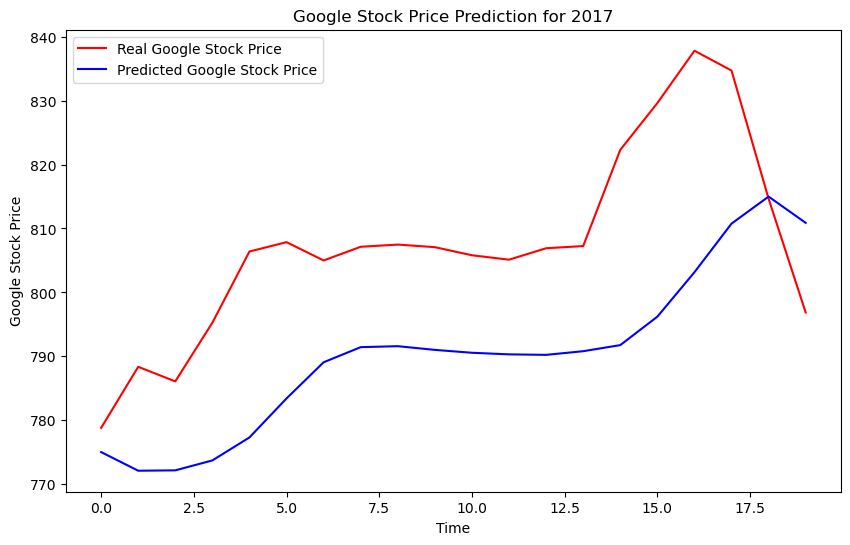

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(test_df['Open'].values, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction for 2017')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
